- Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


#ML Models

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


- load the dataset

In [ ]:
import os
import zipfile
from google.colab import files
files.upload()
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
with zipfile.ZipFile("creditcardfraud.zip", 'r') as zip_ref:
    zip_ref.extractall("creditcardfraud")

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df = pd.read_csv("creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Data Preprocessing

In [ ]:
df.isna().sum() # Checking for any missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print("duplicates:", df.duplicated().sum()) # checking for duplicates
df.drop_duplicates(inplace=True)

duplicates: 1081


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [ ]:
df.drop('Time',axis=1, inplace=True) #Not Useful for Modeling

In [ ]:
X= df.drop(columns=['Class']) #These remaining columns are the features that I will use for training a machine learning model.
y= df['Class'] #Target Label
X.shape, y.shape

((283726, 29), (283726,))

In [ ]:
from sklearn.preprocessing import StandardScaler
df_temp = df.copy()
standard = StandardScaler()
amount = df_temp['Amount'].values
df_temp['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = df_temp.drop('Class', axis=1)
y_scaled = df_temp['Class']
X_scaled.shape, y_scaled.shape

((283726, 29), (283726,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

- EDA & Visualization

In [ ]:
class_count_df = pd.DataFrame(df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

<ipython-input-13-5fcb024199b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_count_df['Class'].replace({0:'Normal',


,Class,Counts
0,Normal,283253
1,Fraud,473


<ipython-input-14-bf8448d5e791>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
<ipython-input-14-bf8448d5e791>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


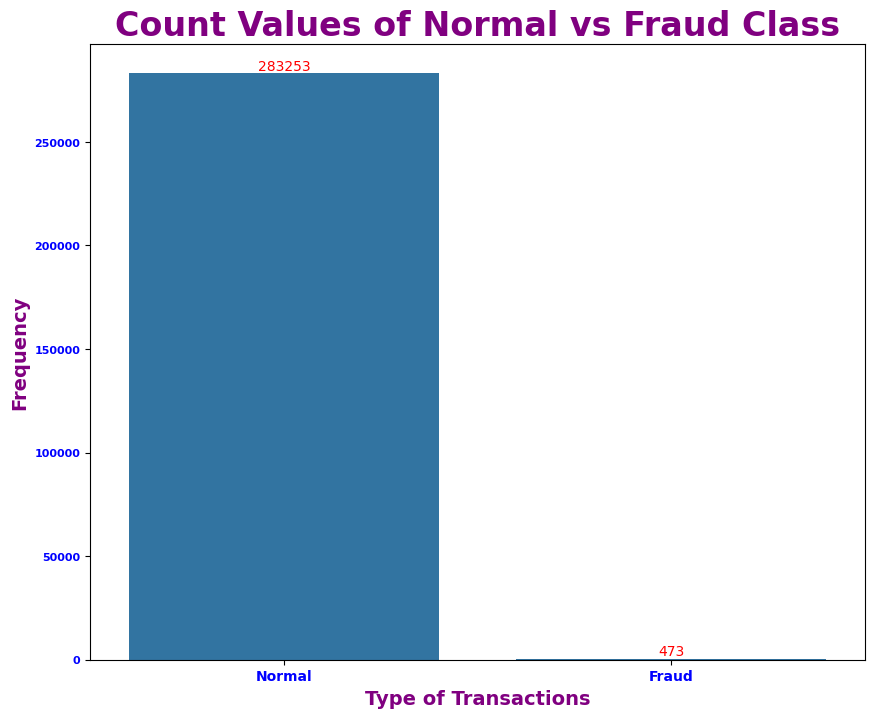

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')


In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

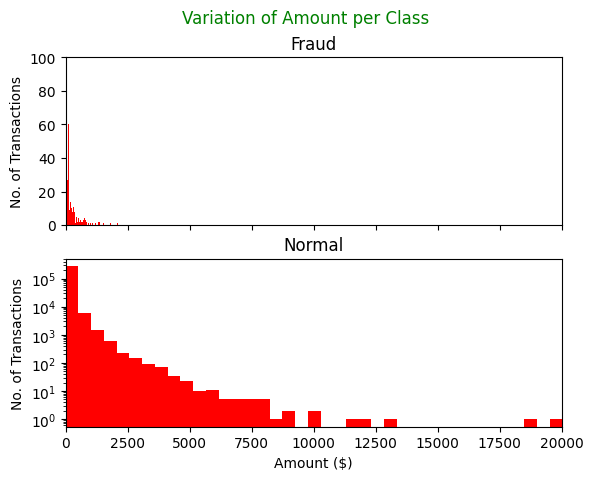

In [ ]:

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')


- Handling Imbalanced Datasets

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []


=== Logistic Regression ===
Accuracy: 0.9802861909349374
Confusion Matrix:
 [[83314  1662]
 [   16   126]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.89      0.13       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.56     85118
weighted avg       1.00      0.98      0.99     85118



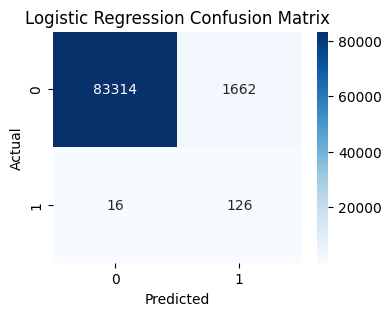


=== Random Forest ===
Accuracy: 0.9995418125425879
Confusion Matrix:
 [[84966    10]
 [   29   113]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.80      0.85       142

    accuracy                           1.00     85118
   macro avg       0.96      0.90      0.93     85118
weighted avg       1.00      1.00      1.00     85118



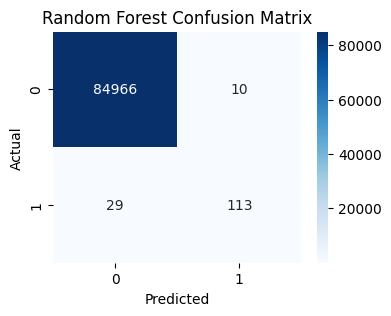

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Accuracy: 0.9993655865974295
Confusion Matrix:
 [[84951    25]
 [   29   113]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.82      0.80      0.81       142

    accuracy                           1.00     85118
   macro avg       0.91      0.90      0.90     85118
weighted avg       1.00      1.00      1.00     85118



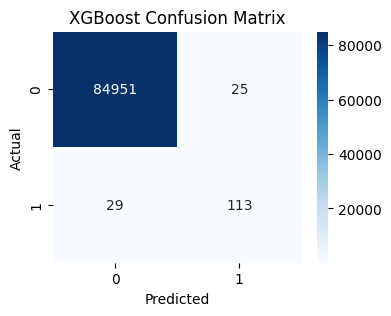

In [ ]:
results = []

for name, model in models.items():
    # Train on SMOTE data
    model.fit(X_train_sm, y_train_sm)
    # Predict on the original test set
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    cr  = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Fraud)': cr['1']['precision'],
        'Recall (Fraud)': cr['1']['recall'],
        'F1-score (Fraud)': cr['1']['f1-score']
    })

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
results_df = pd.DataFrame(results)

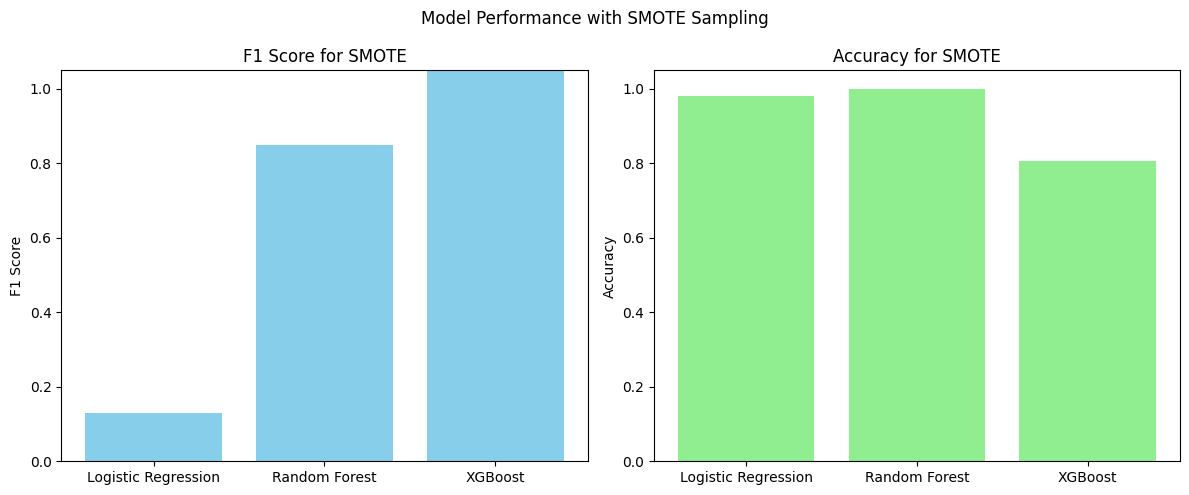

In [ ]:
# SMOTE-only results
smote_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'F1 Score': [0.13, 0.85, 99.94],
    'Accuracy': [0.9803, 0.9995, 0.807]
})

# Plotting F1 Score and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# F1 Score plot
ax[0].bar(smote_results['Model'], smote_results['F1 Score'], color='skyblue')
ax[0].set_title('F1 Score for SMOTE')
ax[0].set_ylabel('F1 Score')
ax[0].set_ylim(0, 1.05)

# Accuracy plot
ax[1].bar(smote_results['Model'], smote_results['Accuracy'], color='lightgreen')
ax[1].set_title('Accuracy for SMOTE')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1.05)

plt.suptitle('Model Performance with SMOTE Sampling')
plt.tight_layout()
plt.show()






